# Preprocess EDG 
We will preprocess the example EDA data that was provided by OpenSignals.

## 1. Import packages and load the data 

In [8]:
import pandas as pd  # installing neurokit2 installs most other packages too
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pickle

## 2. Read in the data
No need to concatenate the read in data files because we are working with a single data file 

In [9]:
# assemble file name 
filename = '/Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data/example_eda.csv'

# read in the data in respective conditions
eda_data = pd.read_csv(filename)
print(eda_data)

       # EDA
0      102.0
1      102.0
2      102.0
3      102.0
4      102.0
...      ...
33145  208.0
33146  208.0
33147  208.0
33148  208.0
33149  208.0

[33150 rows x 1 columns]


## recap

Preprocessing steps described here follows pyEDA : Aqajari et al., 2021. pyeda: *An open-source python toolkit for pre-processing and feature extraction of electrodermal activity*.

## 2. Downsample to 10 Hz
The example data we use has a sampling rate of 1000 Hz. If you set the amplifier sampling rate to 10 Hz, this does not need to be implemented. 


In [16]:
# Downsample from 1000 Hz to 10 Hz by selecting every 100th sample
downsample_factor = 100  # From 1000 Hz to 10 Hz
eda_data_downsampled = eda_data.iloc[::downsample_factor]  # Select every 100th sample

# Display the downsampled data
print(eda_data_downsampled.head())

     # EDA
0    102.0
100  102.0
200  102.0
300  101.0
400  101.0


## 3. Moving average 
A moving average across a 1-second window is first used to smooth the data and reduce artifacts such as body gestures and movements, which are common in everyday settings.

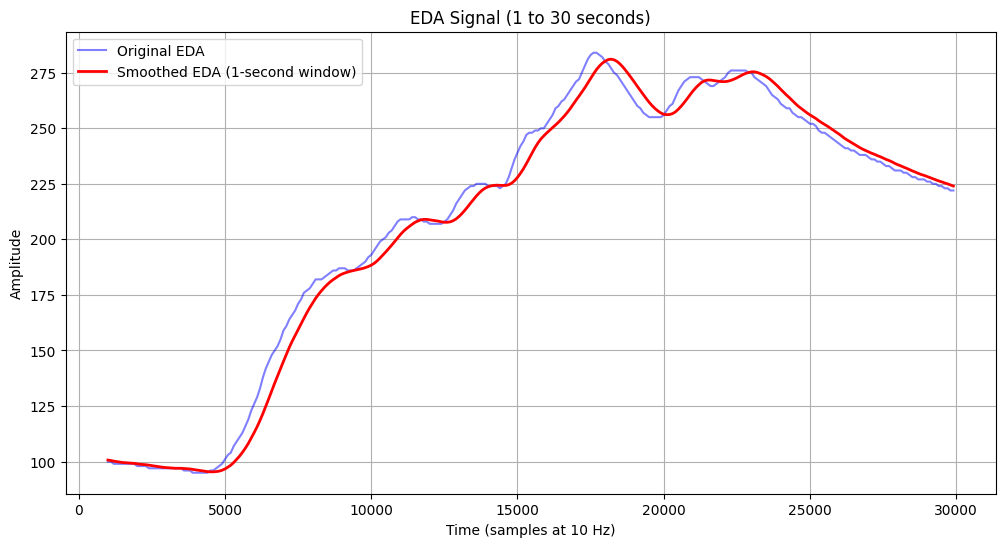

In [17]:
# Assign the correct column name
eda_data_downsampled.columns = ['EDA']  

# Apply the rolling window for the moving average
window_size = 10  # 1-second window for smoothing
eda_data_movav = eda_data_downsampled["EDA"].rolling(window=window_size).mean()

# Extract data for the range 10 to 30 seconds (sampling rate of 10 Hz)
sampling_rate = 10  # Hz
start_index = 1 * sampling_rate
end_index = 30 * sampling_rate
subset = eda_data_downsampled.iloc[start_index:end_index].copy()  # Ensure this is a copy
movavsubset = eda_data_movav.iloc[start_index:end_index].copy()

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(subset["EDA"], label="Original EDA", alpha=0.5, color="blue")
plt.plot(movavsubset, label="Smoothed EDA (1-second window)", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("EDA Signal (1 to 30 seconds)")
plt.xlabel("Time (samples at 10 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

## 4. Save the data

In [12]:
# File path to derivative data folder
derivative_folder = '/Users/erwin/Documents/ProjectPsychophysiologyResources/preprocessed-data/'
output_filename   = derivative_folder + 'preprocessed_eda.pkl'

# Save alldata as a pickle file
with open(output_filename, 'wb') as f:
    pickle.dump(eda_data_movav, f)